## Accuracy, Sensitivity and Specificity

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression


In [2]:
df = pd.read_csv('admissions.csv')
df.head()

,admit,gpa,gre
0,0,3.177277,594.102992
1,0,3.412655,631.528607
2,0,2.728097,553.714399
3,0,3.093559,551.089985
4,0,3.141923,537.184894


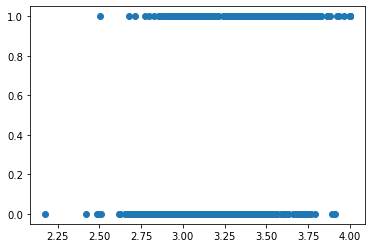

In [3]:
plt.scatter(df['gpa'],df['admit'])
            # plt.scatter(admissions['gpa'],admissions['admit'])

In [4]:
logistic_model = LogisticRegression()
logistic_model.fit(df[['gpa']],df['admit'])

LogisticRegression()

In [5]:
pred_probs = logistic_model.predict_proba(df[['gpa']])
pred_probs

array([[0.66343633, 0.33656367],
       [0.53967962, 0.46032038],
       [0.84160275, 0.15839725],
       ...,
       [0.69368514, 0.30631486],
       [0.46457162, 0.53542838],
       [0.47350995, 0.52649005]])

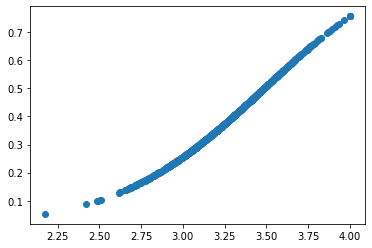

In [6]:
plt.scatter(df['gpa'],pred_probs[:,1])

,admit,gpa,gre,predicted_label
0,0,3.177277,594.102992,0
1,0,3.412655,631.528607,0
2,0,2.728097,553.714399,0
3,0,3.093559,551.089985,0
4,0,3.141923,537.184894,0


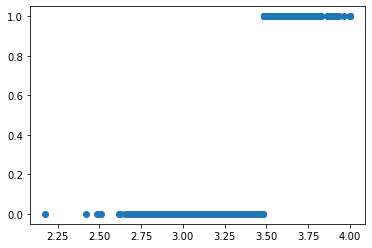

In [7]:
model = LogisticRegression()
model.fit(df[['gpa']],df['admit'])
labels = model.predict(df[["gpa"]])
plt.scatter(df["gpa"],labels)
plt.show
df['predicted_label'] = labels
df.head()

## Accuracy

In [8]:
df['actual_label'] = df['admit']
matches = df['actual_label'] == df['predicted_label']
correct_predictions = df[matches]
correct_predictions.head()
accuracy = len(correct_predictions)/len(df)
accuracy

0.6847826086956522

In [9]:
TP_filter = (df['predicted_label'] == 1) & (df['actual_label'] == 1) #true positive
TN_filter = (df['predicted_label'] == 0) & (df['actual_label'] == 0) # true negative
FP_filter = (df['predicted_label'] == 1) & (df['actual_label'] == 0) #false positive
FN_filter = (df['predicted_label'] == 0) & (df['actual_label'] == 1) #false negative

TP = len(df[TP_filter])
TN = len(df[TN_filter])
FP = len(df[FP_filter])
FN = len(df[FN_filter])

print(TP,TN,FP,FN)

89 352 48 155


In [10]:
sensitivity = TP/(TP+FN)
specificity = (TN) / (FP + TN)
print(specificity)
print(sensitivity)


0.88
0.36475409836065575
